<img   src="../figuras/logo/TalentQ_LogoPosNegro.png" align=center  width="12%"/>
<br>

<table width="100%">
<td style="font-size:350%px;font-style:italic;text-align:right;background-color:rgba(0, 160, 120,0.6)">
Estimación de Fase Cuántica y Aplicaciones
</td></table>


$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\i}{{\color{blue} i}} $ 
$ \newcommand{\Hil}{{\cal H}} $
$ \newcommand{\cg}[1]{{\rm C}#1} $



In [1]:
%run ../macro_CURSO.py


- [Estimación cuántica de fase](#QPE)


- [Orden modular](#OrdMod)



<a id='QPE'></a>
<table width="100%">
    <td style="font-size:250%px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b> Estimación Cuántica de Fase </b>
</table>   

 Sea $U$ un operador unitario y  $\ket{u}$ un autovector. Por ser unitario, su autovalor es una fase compleja 
<br>
<br>

$$
U \ket{u} = e^{2\pi i \varphi} \ket{u}\, ,
$$
<br>



**Promesa**: *podemos preparar*  $\ket{u}$ y aplicar el operador $U$ tantas veces como queramos. 


**Problema**:  calcular  la *mejor aproximación posible* a $\varphi$. 

<div class="alert alert-block alert-danger">
<b> Notar: </b> 
<br>    
Las fases  $e^{i2\pi \varphi}=e^{i2\pi (\varphi+n)}$  son iguales, para cualquier $n\in {\mathbb Z}$ entero. Por tanto será suficiente considerar  $\varphi \in [0,1)$ para generar <i>todos</i> los  posibles autovalores distintos.
</div> 
 
 

<center> 
<img src="./figuras/QPE.png" width='50%' style='margin:automatic'/>
</center>


El circuito  QPE ("Quantum Phase Estimation") viene representado en la figura,  donde el primer registro tiene dimensión $t$ y la entrada es el estado $\ket{0}_t\otimes \ket{u}$.  

- La dimensión $t$ del primer registro **controlará la precisión de nuestra aproximación** a $\varphi$. 


- La dimensión $n$ del espacio al que pertenece $\ket{u}$  es la necesaria para servir de espacio de representación para $U$.


Si el primer registro tiene $t$ cúbits el estado que genera el circuito justo antes de la transformada de Fourier

\begin{eqnarray}
\ket{0}_t \otimes \ket{u} ~ &\stackrel{H^t}{\longrightarrow} & ~  \sum_{y\in S_t}\ket{y}_t \otimes \ket{u} ~ =  \sum_{y_0...y_{t-1}=0,1}\ket{y_{t-1}}...\ket{y_0}\otimes \ket{u}  
\\   \rule{0mm}{10mm}
 &\stackrel{\cg{U^y}}{\longrightarrow} & \sum_{y_0...y_{t-1}=0,1}\ket{y_{t-1}}...\ket{y_0}\otimes U^{y_{t-1}2^{t-1}}...U^{y_0 2^{0}} \ket{u} \\  \rule{0mm}{10mm}
 && =    \sum_{y\in S_t} \ket{y} \,  U^{y_{t-1}2^{t-1}+ \ldots +y_0 2^0}\ket{u}  \\
 && = \,    \sum_{y\in S_t} \ket{y} \,  U^y\ket{u} \rule{0mm}{10mm}
\end{eqnarray}

**La clave**: cuando $\ket{u}$ es un <i>autoestado</i>  de $U$, se produce un <i>retroceso de fase</i> 
<br>
<br>
<br>
\begin{eqnarray}
 \frac{1}{2^{t/2}} \sum_{y\in S_t} \ket{y} U^{y}\ket{u}  ~= ~  \frac{1}{2^{t/2}} \sum_{y\in S_t} \ket{y} \otimes e^{2\pi i \varphi y}  \ket{u} ~= ~ \frac{1}{2^{t/2}} \sum_{y\in S_t} e^{2\pi i (2^t \varphi)  y/2^t} \ket{y} \otimes \ket{u}  \label{fase1}  
\end{eqnarray}

<u>Observa el primer registro</u> : parece la <i>transformada de Fourier</i> $\ket{\widetilde{2^t \varphi}}$   del vector $\ket{2^t \varphi}$ 

$$
  \frac{1}{2^{t/2}} \sum_{y\in S_t} e^{2\pi i (2^t \varphi)  y/2^t} \ket{y}  
  = U_{TFC}\ket{2^t \varphi} =  \ket{\widetilde{2^t \varphi}}  
$$

 Esto sería correcto si el número $2^t\varphi \in S_t$ *fuese un entero*

Sin embargo $2^t\varphi \notin {\mathbb Z}$ en general <b>¡ no será
un entero </b>!

  Vamos entonces a separarlo en la forma siguiente en sus partes *entera* $a\in {\mathbb Z}$ y *mantisa* $\delta \in [0,1)$

$$
2^t \varphi  =a + \delta 
$$

<br>
<br>

<div class="alert alert-block alert-warning">
<b> Ejemplo: </b> si $\varphi = 0.4375 \in [0,1) $ entonces
<br>
    
- $ 2^2 \varphi = 1.75 \Rightarrow a=1~,~\delta = 0.75$ 
- $ 2^3 \varphi = 3.5~ \Rightarrow a=3~,~\delta = 0.5$ 
- $ 2^4 \varphi = 7  ~~~ \Rightarrow a=7~,~\delta = 0$
    
En el fondo esto es así porque $0.4375 = 7 / 2^{4}$ pero si $\varphi$ fuese *irracional* no existiría ningún $t$ para el cuál $2^t\varphi$ no tenga mantisa.   
</div>

Vamos a terminar el circuito
<center> 
<img src="./figuras/QPE.png" width='40%' style='margin:automatic'/>
</center>




Introduciendo el cambio de variable $2^t \varphi  =a + \delta$  efectuamos la transformada de Fourier inversa en el primer registro
<br>
<br>

\begin{eqnarray}
U^\dagger_{TFC} \frac{1}{\sqrt{2^t}} \sum_{y=0}^{2^t-1} e^{2\pi i  \, (a + \delta) y/2^t} \ket{y} &=&\frac{1}{\sqrt{2^t}} \sum_{y=0}^{2^t-1} e^{2\pi i  \, (a + \delta) y/2^t} U^\dagger_{TFC} \ket{y}
\\ \rule{0mm}{10mm}
~&=&~ \frac{1}{2^{t}}  \sum_{y=0}^{2^t-1}  e^{2\pi i (a + \delta) y/2^t}\left( \sum_{x=0}^{2^t-1}e^{-2\pi i  yx/2^t}\ket{x} \right)   \\
~&=&~ \frac{1}{2^{t}} \sum_{x=0}^{2^t-1} \sum_{y=0}^{2^t-1}  e^{2\pi i (a + \delta  -x) y/2^t} \ket{x}  ~ \equiv ~ \ket{\Phi}
\end{eqnarray}

<br>

Si $\underline{\delta = 0}:~$  es decir, si $2^t\varphi$ fuese un entero $a\in S_t = \{0, \ldots, 2^t-1\}$, 
 entonces el resultado
sería  <b>exactamente</b> $\ket{\Phi} = \ket{a} = \ket{2^t\varphi}$ 
<br>
<br>
\begin{eqnarray}
\ket{\Phi} &=&  \sum_{x=0}^{2^t-1} \frac{1}{2^{t}}  \left(\sum_{y=0}^{2^t-1}  e^{2\pi i (a-x) y/2^t} \right)\ket{x}  \\  \rule{0mm}{10mm}
&=&  \sum_{x=0}^{2^t-1}  \frac{1}{2^{t}} \left(2^t \delta_{x,a} \right)\ket{x}\\ \rule{0mm}{10mm}
&=& \ket{a}
\end{eqnarray}




En este caso: 
 
-    **midiendo el primer registro cuántico** obtendríamos en  binario el número $a\in[0, 2^t-1]$ 

-    con $a$, y como $t$ es conocido,  recuperaríamos la *fase* buscada *de forma exacta*.

$$
 \varphi = \frac{a}{2^t}  \in [0,1)
$$ 
 
 


Si $\underline{\delta \neq 0}:~$ 

- El estado en el primer registro  $\ket{\Phi} = \sum_{x=0}^{2^t-1} f(x) \ket{x}$ será una superposición. 
<br>
<br>

$$
\ket{\Phi} =  \sum_{x=0}^{2^t-1} \left( \frac{1}{2^{t}}\sum_{y=0}^{2^t-1}  e^{2\pi i (a + \delta  -x) y/2^t} \right) \ket{x}  
= \sum_{x=0}^{2^t-1} f(x) \ket{x}
$$
<br>



- Una medida dará el registro binario de *un número entero* $x \to m \in [0,2^t-1)$ con distribución de probabilidad $p(m) = |f(m)|^2$ centrada en $m=a=[2^t\varphi]$



### Ejemplo

Vamos a estudiar esta distribución analizando el operador unitario de fase
<br>
<br>

$$
U =  \begin{bmatrix} e^{2\pi i \phi_0} & 0 \\ 0 & e^{2\pi i\phi_1}\end{bmatrix} 
$$
<br>

que tiene por autoestados  $\ket{0}$ y $\ket{1}$ con autovalores $e^{2\pi\phi_0}$ y $e^{2\pi \phi_1}$ respectivamente. 
<br>
<br>


Para programar este operador notamos que 
<br>
<br>

$$
U =  
\begin{bmatrix} e^{2\pi \phi_0} & 0 \\ 0 & e^{-2\pi i\phi_0}\end{bmatrix}
\begin{bmatrix} 1 & 0 \\ 0 & e^{2\pi i(\phi_0+\phi_1)}\end{bmatrix} = 
R_z(\theta = -4\pi \phi_0) \cdot P(\theta = 2\pi (\phi_1+\phi_0))
$$
<br>


El circuito requiere la versión *controlada* $\cg U^k$ de potencias de este operador

In [2]:
def c_Uop(phi0,phi1,power):
    U = QuantumCircuit(1)        
    for _ in range(power):
        U.rz(-phi0*4*np.pi,0)
        U.p((phi1+phi0)*2*np.pi,0)
    U = U.to_gate()
    U.name = "c_U(%f ,%f)^%i" % (np.round(phi0,5), np.round(phi1,5),power)
    U = U.control()
    return U
    

Para poner a prueba el algoritmo vamos a  por seleccionar unos valores de $\phi_i = (\phi_0,\phi_1)$ de la forma  

$$\phi_i = (a_i + \delta_i) 2^{-t}$$

In [3]:
t_seed=3 

a0 = 2.
delta0 = 0.1
phi0 = (a0+delta0)*2.**(-t_seed) 

a1 = 3.
delta1 = 0.
phi1 =(a1+ delta1)*2.**(-t_seed) 

print('phi0=', phi0, ' ->   2^t*phi0 = a0 + delta0 = ', 2**t_seed*phi0 , ' , a0 =' ,int(2**t_seed*phi0), '=>', format(int(2**t_seed*phi0),'b').zfill(t_seed) )
print('phi1=', phi1, ' ->   2^t*phi1 = a1 + delta1 = ', 2**t_seed*phi1 , ' , a1 =' ,int(2**t_seed*phi1), '=>', format(int(2**t_seed*phi1),'b').zfill(t_seed) )


phi0= 0.2625  ->   2^t*phi0 = a0 + delta0 =  2.1  , a0 = 2 => 010
phi1= 0.375  ->   2^t*phi1 = a1 + delta1 =  3.0  , a1 = 3 => 011


Construimos el circuito QPE

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

t = 4 # la dimensión del registro de evaluación 
n = 1 # la dimensiónd el espacio de representación del opeador U

qrt=QuantumRegister(t,name="t")
qra=QuantumRegister(n,name="qr_U") # aquí 1 es la dimensión del espacio en el que opera U
crt=ClassicalRegister(t)

qpe = QuantumCircuit(qrt,qra,crt)   

##########################################################################
#inicializamos la ancilla en un autoestado |u> =|0> o |u> = |1> si queremos obtener phi_0 o phi_1
#qpe.x(qra)   
##########################################################################

qpe.h(range(t))
qpe.barrier()

# aplicamos los operadores controlados c-U^j 
for j in range(t):
    qpe.append(c_Uop(phi0,phi1,2**j),[qrt[j]]+qra[:])   

qpe.barrier()

# aplicamos la QFT^-1 que está definida en macro.py 
qpe.append(TFC_adj(t),qrt)

# podemos hacerlo usando la librería de qiskit 
#from qiskit.circuit.library import QFT
#qpe.append(QFT(len(qr),do_swaps=True).inverse(),qr)

qpe.measure(qrt,crt)

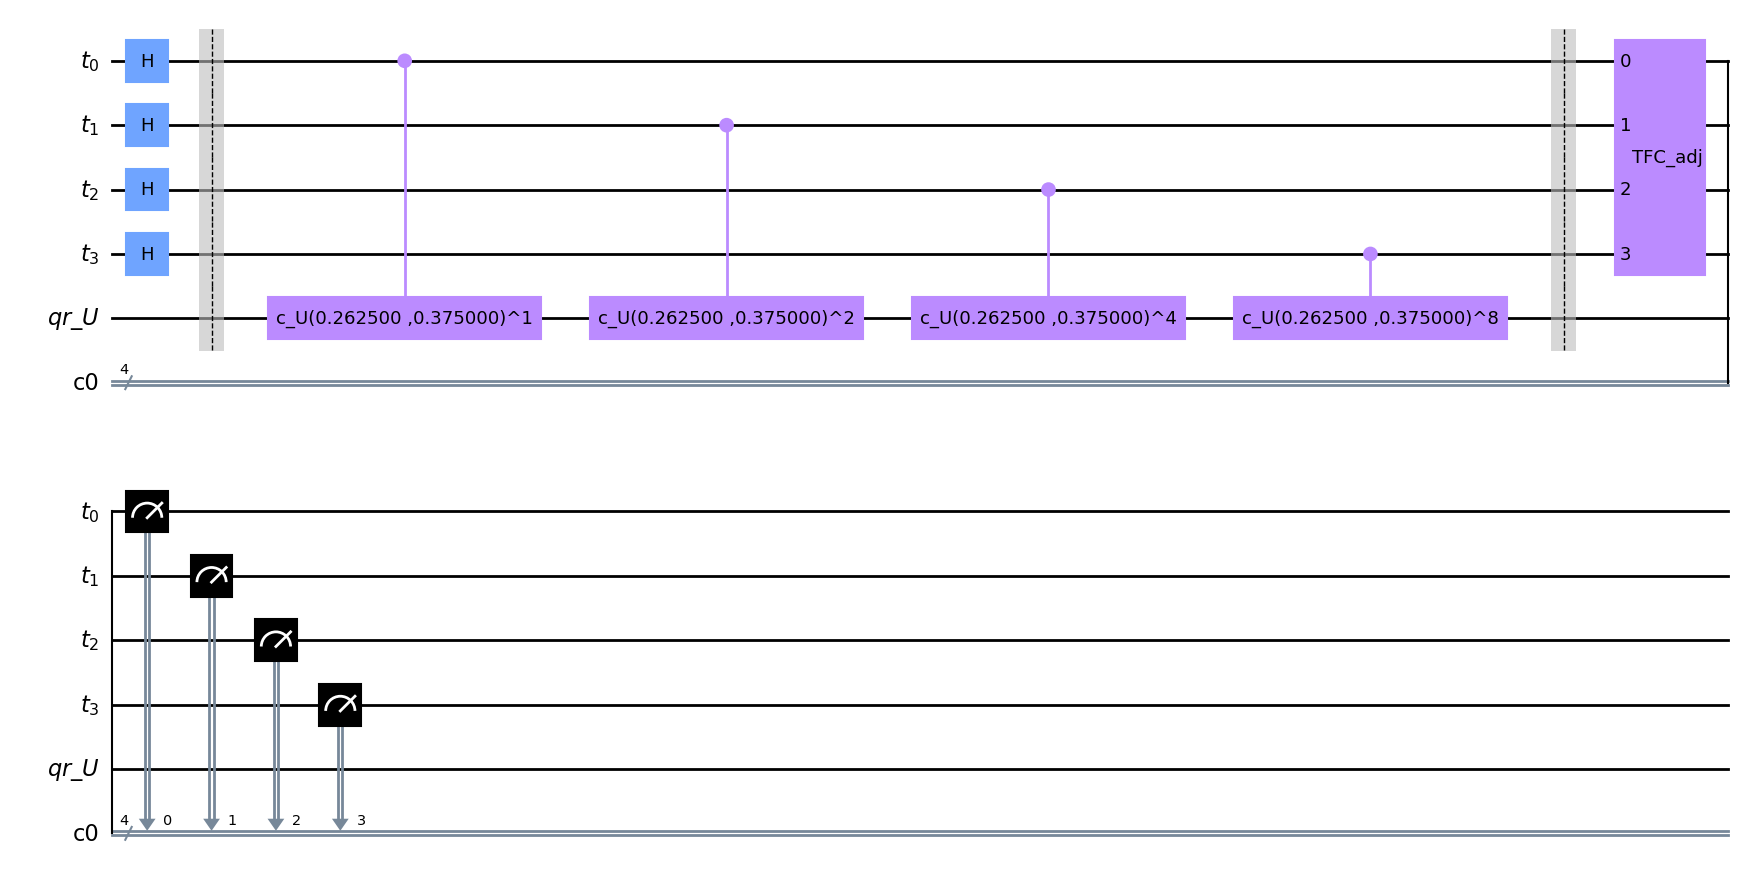

In [5]:
qpe.draw(output="mpl")

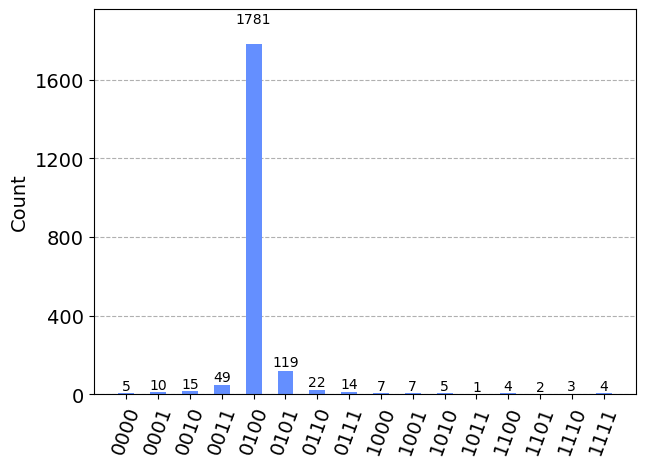

In [6]:
from qiskit import Aer, execute
M_backend = Aer.get_backend('qasm_simulator')

from qiskit.visualization import plot_histogram
results = execute(qpe, M_backend, shots=2048).result()
counts = results.get_counts()
plot_histogram(counts)

En resultado nos da la aproximación mejor a $~a = [2^t \phi]$

In [7]:
max(counts, key=counts.get)

'0100'

In [8]:
a_resultante = int(max(counts, key=counts.get),2)

# Seleccionamos el autovalor asociado a |u> 
phi = phi0  # si |0>
#phi = phi1   # si |1>

print('el valor de phi original era =', phi)

print('la mejor aproximación al valor verdadero es a/2^t =', a_resultante*2**(-t))

print('el error relativo es delta/(2^t phi) =', (phi -a_resultante*2**(-t))/phi)

el valor de phi original era = 0.2625
la mejor aproximación al valor verdadero es a/2^t = 0.25
el error relativo es delta/(2^t phi) = 0.04761904761904766


### Distribución de medidas

Corriendo el circuito observamos que para el caso general $2^t \phi = a+\delta$ las distintas medidas del estado resultante $\ket{m}$ se distribuirán en el torno a un *valor central* $\ket{a} = \ket{[2^t\varphi]} $.

 Escribiendo $\ket{m=a+l}$  podemos obtener la *distribución de probabilidad* $p(m) = p(\delta, l)$ de medir $m=a+l$ como función de la *mantisa* $\delta$
<br>
<br>

\begin{eqnarray}
p(\delta, l) ~~&=&~~ \left\vert \,  \bra{a+ l} \,  \frac{1}{2^{t}}\sum_{x=0}^{2^t-1}   \sum_{y=0}^{2^t-1}  e^{2\pi i (\delta + a -x) y/2^t} \ket{x}  \,  \right\vert^2  ~~ \stackrel{x= a + l}{=} ~~
  \frac{1}{2^{2t}} \left\vert \,  \sum_{y=0}^{2^t-1} \left(e^{2\pi i (\delta-l) /2^t}\right)^y \,  \right\vert^2 
\end{eqnarray}

\begin{eqnarray}
&=& ~~  \frac{1}{2^{2t}} \left\vert\,  \frac{1- e^{2\pi i  \,  (\delta-l) }}{1- e^{2\pi i (\delta-l)/2^t}} \, \right\vert^2   ~= ~ 
\frac{1}{2^{2t}} \left\vert \, \frac{\sin \pi   (\delta-l)}{\sin (\pi(\delta-l)/2^t)} \, \right\vert^2 \, 
\hspace{2.5cm}
\end{eqnarray}


De aquí, para $l=0$ 

$$
p(\delta,0) = \frac{1}{2^{2t}} \left\vert \, \frac{\sin \pi   \delta}{\sin (\pi\delta/2^t)} \, \right\vert^2 \, \geq   \frac{1}{2^{2t}} \left(\frac{2 \delta}{\pi\delta/2^t }\right)^2 = \left(\frac{2}{\pi}\right)^2 \sim 0.405 \hspace{4cm}
$$
<br>
<br>

donde hemos usado que   $\pi x\geq \sin(\pi x) \geq 2 x$ para $x\in [ 0,\pi/2 ]$.


A $\delta$ fijo  hasta $\delta = 0.5$, vemos que la probabilidad está *picada* en $l=0$, es decir en $m=a$. A partir de ahí, como es de esperar, está picada en $l=1$. 
<br>
<br>
<center> 
<img src="./figuras/xprobeigenvalues.png" width='40%' style='margin:left'/>
</center>
<br>
<br>
La probabilidad nunca es menor de 0.405 en su máximo.

A $l = 0$ fijo, la probabilidad de encontrar $m=a+0=a$ es 1 cuando $\delta=0$ y decrece con $\delta$. 
<br>
<br>
<center> 
<img src="./figuras/xmaxprobeigen.png" width='40%' style='margin:right'/>
</center>
<br>
<br>
Cuando $l=1$ la probabilidad máxima corresponde al número $m=a+1$.


La **anchura $t$ del circuito auxiliar** determina la anchura de la curva de probabilidad en torno al valor medio.

Ello permite acotar la aproximación al valor real de la fase buscada según el siguiente teorema  (ver Nielsen p. 224)

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Teorema:</b> 
<br>    
    el algoritmo QPE (Quantum Phase Estimation) es capaz de producir ua <i>estimación $m$ de orden $k$</i>  para la fase $\varphi$ (en el sentido de que  $|\varphi- m/2^t |<2^{-k}$) con una  probabilidad $1-\epsilon$,  tomando una dimensión del espacio de representación
<br>
<br>
$$
t \geq k  + \left[ \log\left(1 + \frac{1}{2\epsilon}\right) \right] \label{tedeene}
$$
</div>

### ¿y si no podemos preparar  un autoestado?

Una de las premisas usadas en la sección anterior es la posibilidad de preparar el autoestado $\ket{\psi}$ de $U$ 

En caso contrario, ¿qué *resultado* obtenemos después de usar el circuito de estimación cuántica de fase?


Apliquemos el circuito anterior a un vector arbitrario $\ket{b}$. Genéricamente dicho vector admitirá una expansión de la forma

$$
\ket{b} = \sum_{i=1}^N c_i \ket{u_i}
$$
en la *base de autovectores* de $U$

$$U\ket{u_i} = e^{2\pi i\varphi_i}\ket{u_i}$$  






Debido a la linealidad del circuito QPE, a la salida del mismo encontraremos una combinación lineal de estados 
de la forma

\begin{eqnarray}
U_{QPE}\, :\,\ket{0}_t \left(\sum_{i=1}c_i\ket{u_i}\right) &=& \sum_{i=1}c_i U_{QPE}\left(\ket{0}_t\ket{u_i}
\rule{0mm}{6mm}\right)  \\
&=& \sum_{i=1}^N  c_i \ket{\Phi_i}\ket{u_i} 
\\
&=& \sum_{i\in S_n}\sum_{x\in S_t} c_i \ket{x}\braket{x}{\Phi_i}\ket{u_i}
\\
&=& \sum_{i\in S_n}\sum_{x\in S_t} c_i \braket{x}{\Phi_i} \ket{x}\ket{u_i} 
\end{eqnarray}



Midiendo en el primer registro $\ket{x}\hookrightarrow \ket{m}$ obtendremos un número entero $\to m $ con probabilidad

$$
p(m) = \sum_i  |c_i|^2  |\braket{m}{\Phi_i}|^2   = \sum_i  |c_i|^2  p(\delta_i,l_i)
$$




La probabilidad $p(m)$ es una **suma ponderada de distribuciones** $p(\delta_i,l_i) =  |\braket{m}{\Phi_i}|^2$
con  $m = a_i + l_i$ *picadas* en torno  $l_i = 0$.


Si $t$ se escoge como en el teorema descrito anteriormente, el resultado será una aproximación $a_i$ a $2^t\varphi_i$ con una probabilidad de acierto de, al menos, $|c_i|^2 (1-\epsilon)$.



*Ejemplo:*

Vamos a correr el circuito QPE inicializando para una  combinaciones $\ket{b} = \cos \theta/2 \ket{0} + \sin \theta/2
 \ket{1}= R_y(\theta)\ket{0}$ de autoestados de $P(\varphi)$.



In [9]:
t_seed = 3

a0 = 1.
delta0 = 0.1
phi0 = (a0+ delta0)*2.**(-t_seed) 

a1 = 3.
delta1 = 0.1
phi1 =(a1+ delta1)*2.**(-t_seed) 

print('phi0=', phi0, ' ->   2^t*phi0 = a0 + delta0 = ', 2**t_seed*phi0 , ' , a0 =' ,int(2**t_seed*phi0), '=>', format(int(2**t_seed*phi0),'b').zfill(t_seed) )
print('phi1=', phi1, ' ->   2^t*phi1 = a1 + delta1 = ', 2**t_seed*phi1 , ' , a1 =' ,int(2**t_seed*phi0), '=>', format(int(2**t_seed*phi1),'b').zfill(t_seed) )


phi0= 0.1375  ->   2^t*phi0 = a0 + delta0 =  1.1  , a0 = 1 => 001
phi1= 0.3875  ->   2^t*phi1 = a1 + delta1 =  3.1  , a1 = 1 => 011


In [10]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

t = 6 # la dimensión del registro de evaluación 
n = 1 # la dimensiónd el espacio de representación del opeador U

qrt=QuantumRegister(t,name="t")
qra=QuantumRegister(n,name="qr_U") # aquí 1 es la dimensión del espacio en el que opera U
crt=ClassicalRegister(t)

qpe = QuantumCircuit(qrt,qra,crt)   

##########################################################################
#inicializamos la ancilla en una combinación cos(th/2)|0> + sin(th/2)|1>
theta = 2*np.pi*0.15 
qpe.ry(theta,qra) 
##########################################################################

qpe.h(range(t))
qpe.barrier()

# aplicamos los operadores controlados c-U^j 
for j in range(t):
    qpe.append(c_Uop(phi0,phi1,2**j),[qrt[j]]+qra[:])
#    qpe.cp(2*np.pi*phi1*(2**j), qrt[j], qra); # This is C-U
    
qpe.barrier()

# aplicamos la QFT^-1 que está definida en macro.py 
qpe.append(TFC_adj(t),qrt)

# podemos hacerlo usando la librería de qiskit 
#from qiskit.circuit.library import QFT
#qpe.append(QFT(len(qr),do_swaps=True).inverse(),qr)

qpe.measure(qrt,crt)

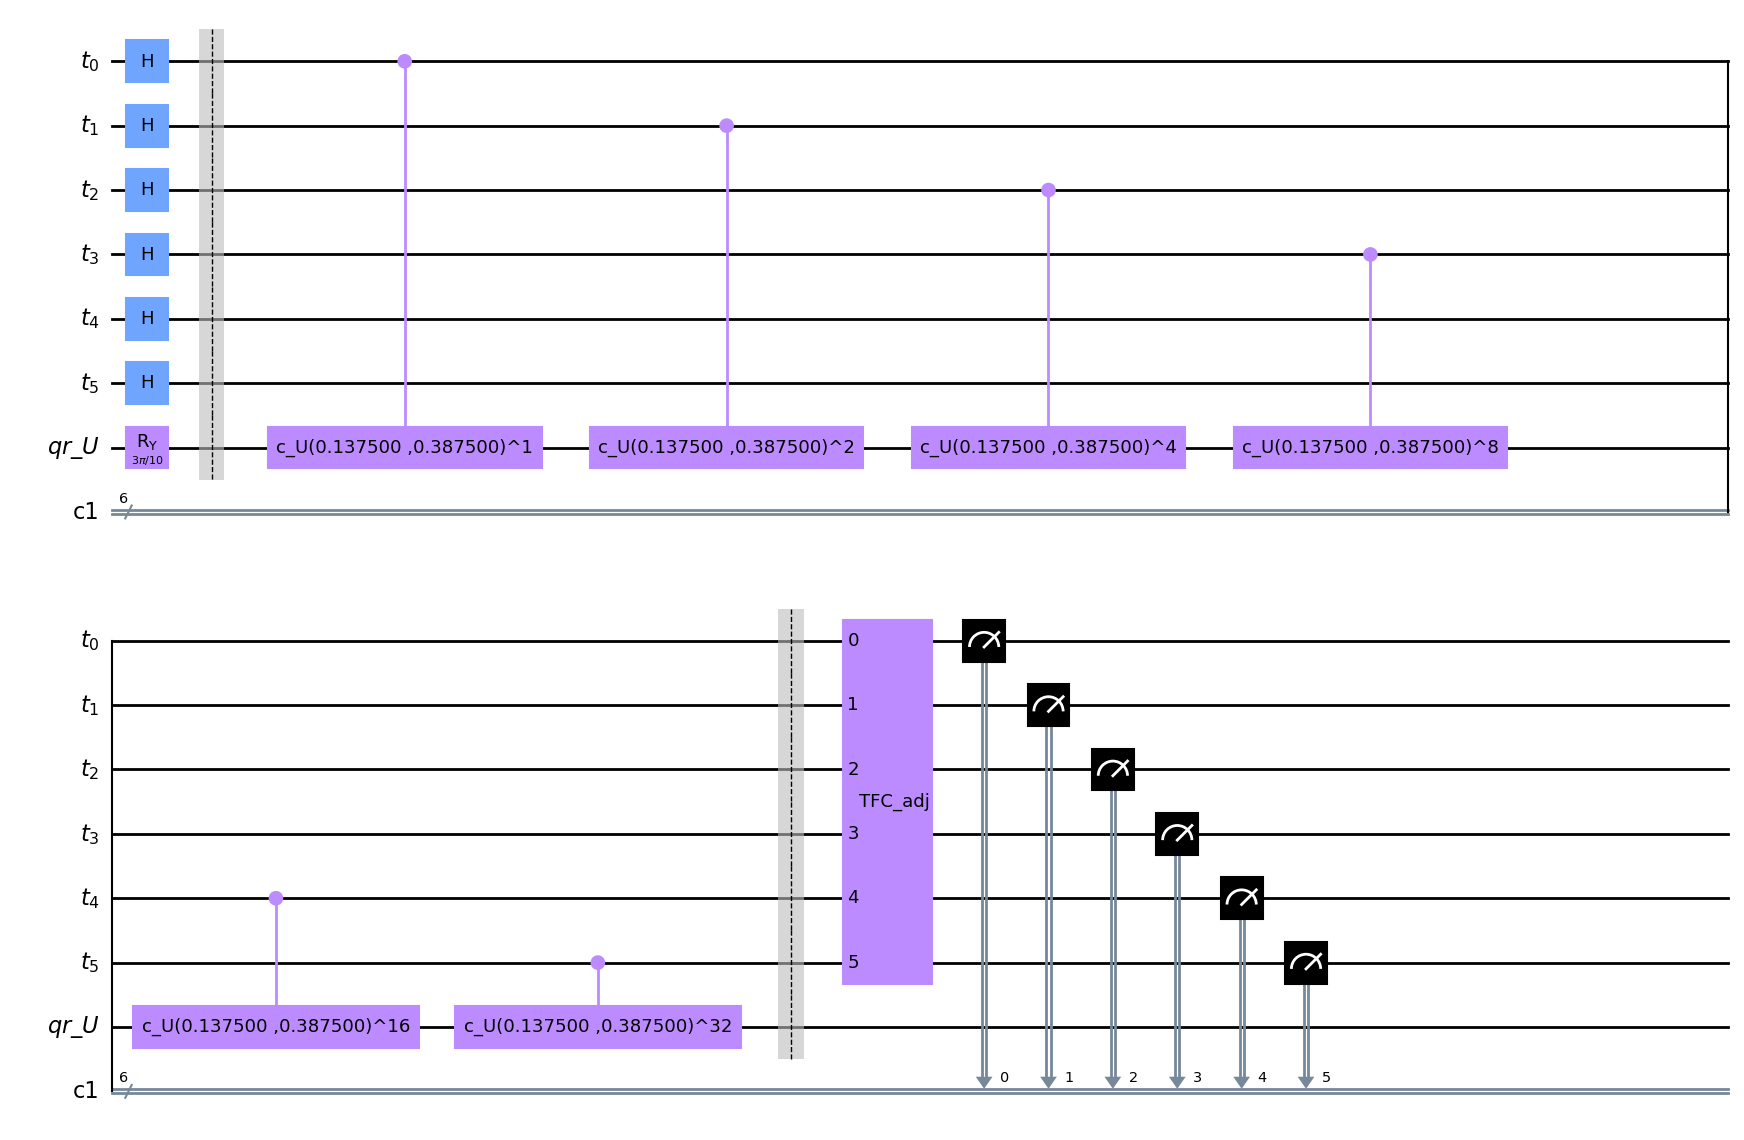

In [11]:
qpe.draw(output="mpl")

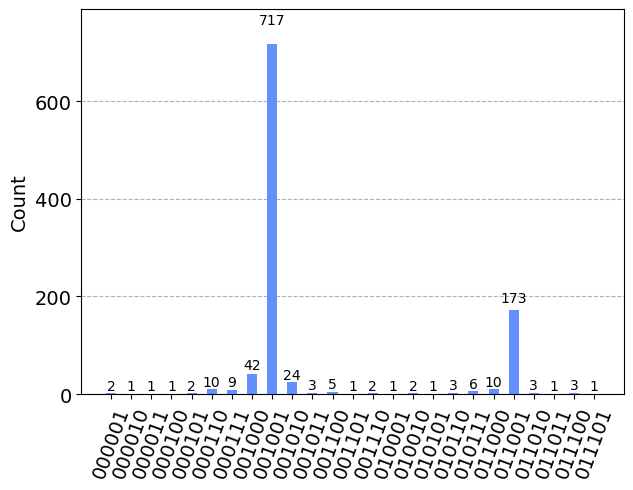

In [12]:
from qiskit import Aer, execute
M_backend = Aer.get_backend('qasm_simulator')

from qiskit.visualization import plot_histogram
results = execute(qpe, M_backend, shots=1024).result()
counts = results.get_counts()
plot_histogram(counts)

<a id='OrdMod'></a>
<table width="100%">
    <td style="font-size:250%px;font-family:Helvetica;text-align:left;background-color:rgba(12, 43, 337, 0.3);">
<b> Orden  modular </b>
</table>   

<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Definición</b> (Orden modular): 
<br>
<br>
Sean $m,N \in {\mathbb N}$ dos enteros $m<N$ coprimos (sin divisores  comunes).<br><br>
Definimos el <b> orden de $m$ módulo $N$</b> como el  menor entero positivo, $r$, tal que $m^r = 1$ mod$N$.
</div>

**Problema**: dados $m$ y $N$,   hallar $r$ con el número mínimo de operaciones.

*Ejemplo:*

In [13]:
{2,4,7,8,11,13}   # posibles valores de m comprimos con N=15
m=7
N=15
[m**i%N for i in range(17)]

[1, 7, 4, 13, 1, 7, 4, 13, 1, 7, 4, 13, 1, 7, 4, 13, 1]

<div class="alert alert-block alert-danger">
En general, si $N=2^n$, clásicamente no existen algoritmos capaces de resolver este problema en un número  de pasos que sea <i> polinómico en $n$</i>. 

Por el contrario, verificar si un $r$ es solución es fácil.
<br>
<br> 
    
Nos hallamos ante un problema de tipo NP.
<div>

<div class="alert alert-block alert-danger">
<b> Notar: </b>
    
Como  $m^r = 1 = m^0$, a partir de ese momento la serie de valores $\{m^0,m^1,\ldots m^{r-1}\}$ se repite. 
Por tanto, halla el <i> orden modular </i> de $m$ módulo $N$  es lo mismo que hallar la <i> periodicidad</i> de la función $f(x) = m^x\, $mod$N$. 
     
    
Sin embargo, si tratamos de fabricar un oráculo para el operador unitario $U_f:\ket{x}\ket{y} \to \ket{x}\ket{m^x y \,{\rm mod} N}$ nos encontraremos con una complejidad exponencial
</div>

Sea $U ; \Hil_n \to \Hil_n $ un oráculo que actúa en la forma siguiente sobre la base $\{\ket{y}\}$  donde $y \in S_n = {0,1,...,N-1}$.

$$
U\ket{y }  = \ket{m y \,{\rm mod} N}
$$


<div class="alert alert-block alert-danger">
Un oráculo general que funcione para cualquier $(m,N)$ no es conocido.
</div>

La composición  $U^x = \underbrace{U\cdot U \cdots U}_{x}$ genera todos los vectores que buscamos

$$
U^x\ket{y }  = U^{x-1}\ket{m y \,{\rm mod} N} =  U^{x-2}\ket{m^2 y \,{\rm mod} N} = ... = \ket{m^x y \,{\rm mod} N}
$$


El *orden* de $m$ mod$N$ es claramente el número $r$ tal que 

$$U^{r }\ket{y}  = \ket{y}$$



Con $U$ podríamos implementar la función $f(x) = m^x{\rm mod} N$ en la forma

$$
U_f \ket{x}\ket{1}  = \ket{x}U^x\ket{1} = \ket{x}\ket{m^x \, {\rm mod} N }
$$

y buscar la periodicidad de $f(x+r) = f(x)$ siguiento el método de la lección anterior.

<div class="alert alert-block alert-danger">
<b> Notar: </b>
<br>
    

- La acción de $U_f$ parece mucho a la de un operador controlado $\cg{U}\ket{x}\ket{y} = \ket{x}U^x\ket{y}$. Sin embargo ahora $x = 0,1,...,2^t-1$ es un entero. El circuito que implementa $U_f$ es precisamente el que se utiliza en el circuito de QPE. 


- Con esta observación vemos que el circuito de QPE se parece mucho al que hemos usado en la búsqueda de un período en el tema anterior.
    

    
</b>    

Vamos a aplicar el  método de <i> Estimación Cuántica de Fase</i> (QPE) al operador $U$ 

Recordemos que dicho método <u>nos pide evaluar el operador $U$ sobre sus autovectores</u> $U\ket{u} = e^{i\varphi}\ket{u}$.

Si *conociésemos* $r$ podríamos construir el siguiente conjunto de $r$  vectores $\ket{u_s}$ con $s=0,...,r-1$ 
<br>
<br>
$$
\ket{u_s} = \frac{1}{\sqrt{r}} \sum_{j=0}^{r-1} e^{-2\pi i \frac{s }{r}j} U^j\ket{1}
$$
<br>


<div class="alert alert-block alert-info">
<p style="text-align: center;"> <p style="text-align: left ;color: navy;">  
<b>Teorema:</b> 
<br>
<br>
 Los vectores   $\{\ket{u_s}\}$   forman un conjunto de <i>autovectores</i> de  $U$ con <i>autovalores</i> $e^{2\pi i s/r}~$. Es decir
<br>    
<br>
$$
U\ket{ u_s} = e^{i\varphi_s} \ket{u_s}
$$
<br>
con 
$$
\varphi_s = s/r~~~~~~ s=0,...,r-1
$$
<br>

**Prueba**:
\begin{eqnarray}
U \ket{u_s} &=& \frac{1}{\sqrt{r}} \sum_{j=0}^{r-1} e^{-2\pi i s j/r} U^{j+1}\ket{1} 
\nonumber\\
 &=& e^{2\pi i \frac{s}{r}}  \frac{1}{\sqrt{r}} \sum_{j=0}^{r-1} e^{-2\pi i  s (j+1)/r} U^{j+1}\ket{1} =
 e^{2\pi i \frac{s}{r}}  \frac{1}{\sqrt{r}} \sum_{j=0}^{r-1} e^{-2\pi i  s j/r} U^{j}\ket{1} 
\nonumber\\
&=& e^{2\pi i s/r} \ket{u_s}\, .  \rule{0mm}{8mm}
\end{eqnarray}


$\bullet$ Podríamos sencillamente aplicar el algoritmo de estimación de fase para *extraer la serie* de valores de $\varphi_s = s/r$ y de ahí recuperar el *orden modular* $r$.

$\bullet$  El problema es que, para generar $\{\ket{u_s}\}$ necesitamos conocer $r$, que, *precisamente, es el dato  que buscamos*

$\bullet$ Una **observación crucial** nos permite soslayar esta dificultad: 

vamos a tomar una *combinación homogénea* de los autoestados $\ket{u_s}$

<br>
<br>
\begin{eqnarray}
\frac{1}{\sqrt{r}} \sum_{s=0}^{r-1}\ket{u_s}   &=& \frac{1}{\sqrt{r}} \sum_{s=0}^{r-1} \left(  \frac{1}{\sqrt{r}}   \sum_{j=0}^{r-1} e^{-2\pi i  sj/r} U^{j}\ket{1} \right) ~=~ \frac{1}{r}   \sum_{j=0}^{r-1} \left(  \sum_{s=0}^{r-1}e^{-2\pi i  sj/r} \right)U^{j}\ket{1} \nonumber\\ 
\rule{0mm}{17mm}
&=&   \frac{1}{r}   \sum_{j=0}^{r-1} \, (r \delta_{j,0}) \,  U^{j}\ket{1} = U^0\ket{1} \nonumber\\  \rule{0mm}{15mm}
&=& \ket{1} = \ket{00....01}
\end{eqnarray}
<br>


<u>¡El resultado es asombrosamente simple!</u>:

si inicializamos el circuito de estimación de fase con el estado $\ket{0}_t\ket{1}_n$, a la salida obtendremos una superposición uniforme

$$
U_{QPE} : \ket{0}_t \otimes \ket{1}_n  ~ \to ~ \frac{1}{\sqrt{r}}\sum_{s=0}^{r-1} \ket{m_s}\otimes\ket{u_s}
$$

donde $m_s = 2^t s/r$ siempre que $t$ se haya elegido de forma que $~2^t s/r \in {\mathbb Z}$ sea entero.


<br>
<center> 
<img src="./figuras/Orden_modular.png" width='65%' style='margin:left'/>
</center>


**Ejemplo**:

Necesitamos un oráculo que implemente la operación $U^{x }\ket{y} = \ket{m^x  y \,{\rm mod} N} $

Para $N=15$ y $m\in \{2,4,7,8,11,13\}$ co-primos este código tomado de [Qiskit Textbook](https://qiskit.org/textbook/ch-algorithms/shor.html) hace el trabajo

In [14]:
def c_amod15(m, power):
    """Controlled multiplication by a mod 15"""
    if m not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if m in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if m in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if m in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if m in [7,11,13]:
            for q in range(4):
                U.x(q)
#    print(U)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (m, power)
    c_U = U.control()
    return c_U

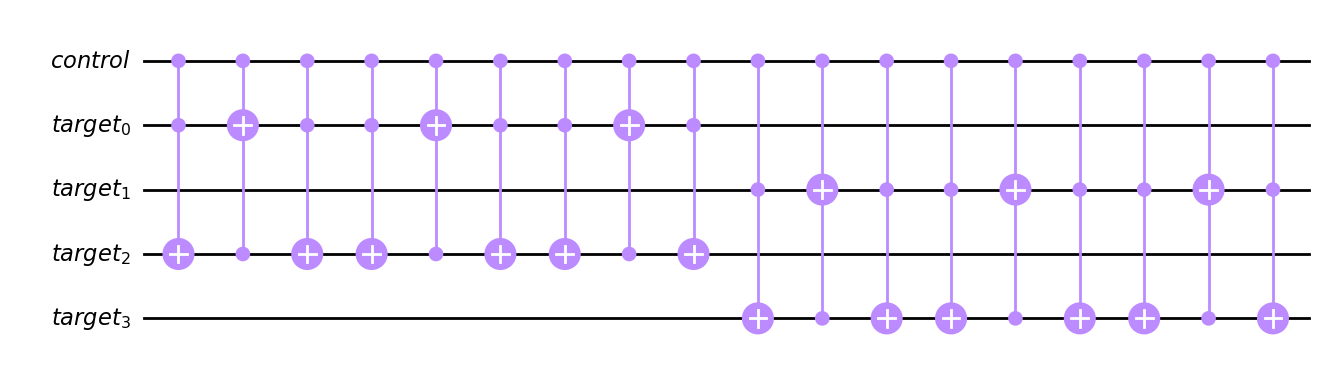

In [15]:
c_amod15(4,3 ).definition.draw('mpl')

<div class="alert alert-block alert-success">
<b>Ejercicio:</b>  <br>
construye un circuito con esta puerta y verifica que reproduce la lista $m^x$ mod 15 con $x=0,1,2,...$
</div>


In [16]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
t = 4 
n = 4 
m = 7  # U^x|y> = |m^x y mod N>

qr=QuantumRegister(t,name="t")
ar=QuantumRegister(4,name="qr_U") # aquí 1 es la dimensión del espacio en el que opera U
cr=ClassicalRegister(t)
qc = QuantumCircuit(qr,ar,cr)   

#  inicializamos la ancilla al autoestado de P(phi) ->  |u> = |1>
qc.x(ar[0]) 


qc.h(range(n))
qc.barrier()

# aplicamos los operadores controlados c-U^j 
for q in range(t):
    qc.append(c_amod15(m, 2**q), [qr[q]] + ar[:])
qc.barrier()

# aplicamos la QFT^-1 que está definida en macro.py 
qc.append(TFC_adj(t),qr)

# podemos hacerlo usando la librería de qiskit 
#from qiskit.circuit.library import QFT
#qpe.append(QFT(len(qr),do_swaps=True).inverse(),qr)

qc.measure(qr,cr)

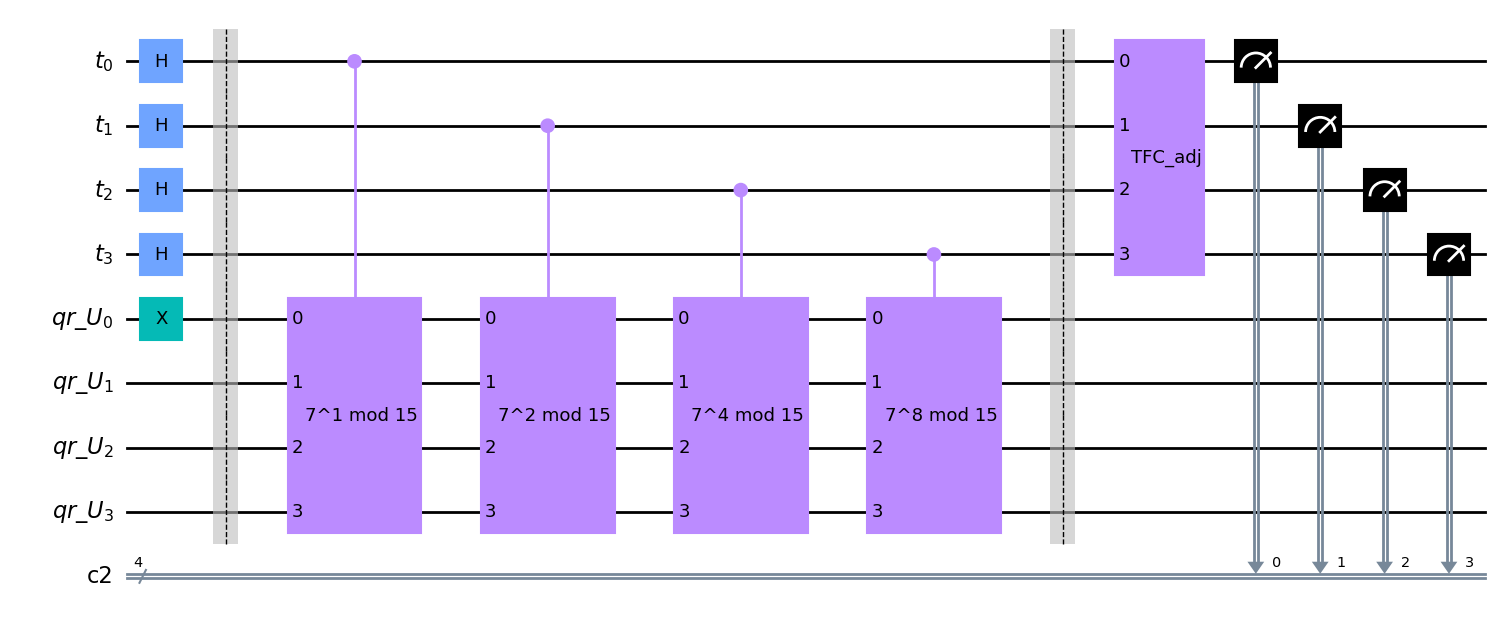

In [17]:
qc.draw(output="mpl")

Ejecutamos el circuito y hacemos el histrograma

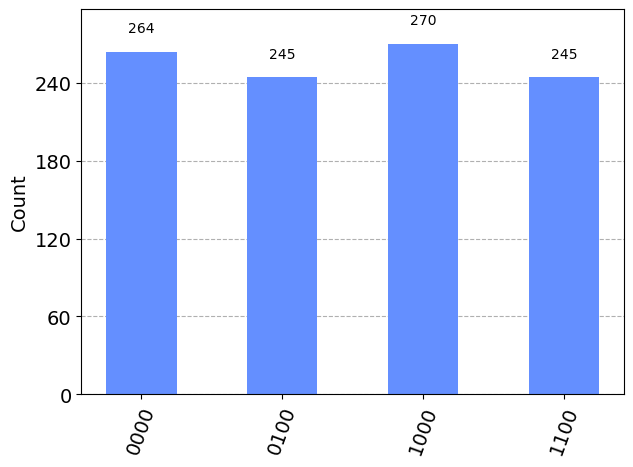

In [18]:
from qiskit import Aer, execute
M_simulator = Aer.get_backend('qasm_simulator')

job = execute(qc,M_simulator,shots = 1024)
counts = job.result().get_counts()
counts

from qiskit.visualization import plot_histogram
plot_histogram(counts)

de aquí obtenemos la lista de valores enteros $2^t s/r$

In [19]:
Ns_list = sorted([int(keys,2) for  keys in counts])[1:] 
print('[2^ts/r] = ', Ns_list)

# dividiendo por 2**t
phis_list = [Ns_list[i]/2**t for i in range(len(Ns_list))]
print('phi_s = ', phis_list)


[2^ts/r] =  [4, 8, 12]
phi_s =  [0.25, 0.5, 0.75]


Ahora podemos usar, como antes, dos estrategias para extraer el valor del período $r$:

1. analizando las diferencias: $r = \displaystyle \left(\frac{s+1}{r} - \frac{s}{r}\right)^{-1}$

In [20]:
diferences = [int((phis_list[s+1]-phis_list[s])**(-1)) for s in range(len(phis_list)-1)]

print(diferences)

print('el valor entero del promedio =', int(sum(diferences)/len(diferences)))

[4, 4]
el valor entero del promedio = 4


2. usando la representación en fracciones continuas: $\, \displaystyle \varphi_s = \frac{s}{r}$

In [21]:
from fractions import Fraction
print('[s/r]=',[Fraction(phis_list[i]).limit_denominator(20) for i in range(int(len(phis_list)))])

[s/r]= [Fraction(1, 4), Fraction(1, 2), Fraction(3, 4)]


<br>

<div class="alert alert-block alert-danger">
<b> Notar: </b>
<br>

- En el caso más general $\varphi_s = 2^t s/r \notin {\mathbb Z}$ no será un entero
    

- Entonces el resultado de la medida $m_s$ seguirá una distribución de probabilidad <i>picada</i> en torno a la parte entera $a_s = [2^t s/r]$
  

- Haciendo un número alto de medidas y seleccionando los eventos  $m_s = a_s$ más probables podemos recuperar $r$ por los mismos métodos anteriores.
    
    
- También podemos hacer una sola medida y calcular un valor de $r$. Comprobar si es solución es un un cálculo eficiente. Si no es correcto volvemos a hacer otra medida hasta que lo encontremos. La probabilidad de hallar una solución crece con el tamaño del registro de trabajo.
</div>